# Лабораторная работа 1

Олег Лайок К33421

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
import numpy as np

In [ ]:
def linan(s1:str,s2:str): # задание 1
  s1 = s1.split(' ')
  s2 = s2.split(' ')
  s1_1 = [int(a) for a in s1]
  s2_1 = [int(a) for a in s2]
  a = np.array([s1_1, s2_1])
  a1 =np.array([[a[0,0],a[0,1]],[a[1,0],a[1,1]]])
  b1 = a[:,2]
  u = np.linalg.solve(a1,b1)
  return u

In [ ]:
linan('1 2 3','3 4 5')

array([-1.,  2.])

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```

In [ ]:
def decorate_matrix(n:int): # задание 2
  b = np.ones((n,n))
  b[1:n-1, 1:n-1] = 0
  return b
decorate_matrix(5)

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
import random
def f(x, a, b):
  return ((x+a)**2-b)

def f_der(x, a, b):#первая производная
  return (2*(x+a))

def g(x,a,b):
  return abs(f(x,a,b))

def g_der(x,a,b): #первая производная
  if f(x,a,b) ==0: return 0
  return (f(x,a,b)/abs(f(x,a,b)))*f_der(x,a,b)

def g_der2(x,a,b):#вторая производная для проверки экстремума
  y = (x+a)**2-b
  try:
    return ((2*(x+a)*abs(y))-((y/abs(y))*y))
  except ZeroDivisionError:
    return 0
#Реализовал алгоритм нахождения точки минимума двумя способами: через градиентный спуск и приравнивания производной к 0
def gradient_decent_f(a, b, e=0.001, n=10000):
  x = random.randint(0-a, 0+a)
  for i in range(n):
    x_d=f_der(x, a, b)
    x = x - e*abs(x_d)
  return x

def gradient_decent_g(a,b, e=0.001, n=100):
  x = random.randint(0-a, 0+a)
  for i in range(n):
    x_d=g_der(x,a,b)
    x = x - e*abs(x_d)
  return x

def min_f(a,b):
  x = (0/2) - a #после приравнивания производной к нулю нашел такой корень уранения
  return x

def min_g(a,b):
  m = [-a,-a+b**(1/2),-a-b**(1/2)] #после приравнивания производной к нулю нашел такие корни уранени
  result = []
  for i in m:
    if g_der2(i,a,b) != None and g_der2(i,a,b) >= 0:
      result.append(i)
  return result
print(min_f(3,4))
print(gradient_decent_f(3, 4))
print(min_g(3,4))
print(gradient_decent_g(3, 4)) #иногда дает далекий от правды ответ, скорее всего из-за специфики самой функции



-3.0
-2.999999989898569
[-1.0, -5.0]
-3.0


Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

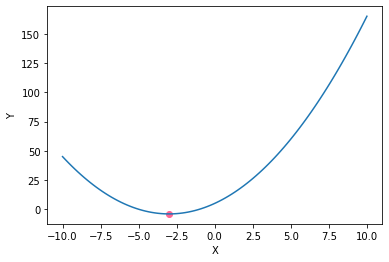

In [ ]:
import matplotlib.pyplot as plt
def plot_function(f,a,b):
    x = np.linspace(-10, 10, 100)
    a1 = [a for i in range(100)]
    b1 = [b for i in range(100)]
    y = list(map(f, x, a1, b1))
    plt.plot(x, y)
    plt.ylabel("Y")
    plt.xlabel("X")
plot_function(f,3,4)
plt.scatter([min_f(3,4)], [f(min_f(3,4),3,4)], color='#FF6692')
plt.show()

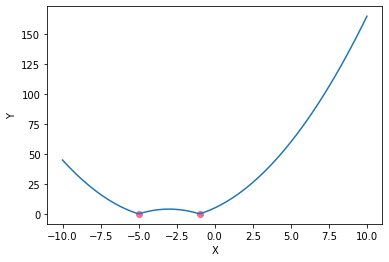

In [ ]:
plot_function(g,3,4)
plt.scatter([min_g(3,4)[1]], [g(min_g(3,4)[1],3,4)], color='#FF6692')
plt.scatter([min_g(3,4)[0]], [g(min_g(3,4)[0],3,4)], color='#FF6692')
plt.show()

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
#task1
p1= 1 - ((2**10 - 2)/(2**10))**1000
#task2
p2= 1 - ((2**10 - 6)/(2**10))**1000
#task3
p3 = 166167000*((1 - (2**10 - 2)/(2**10))**3)*(((2**10 - 2)/(2**10))**997)
print('Ответ 1', p1)
print('Ответ 2', p2)
print('Ответ 3', p3)

Ответ 1 0.858440454732242
Ответ 2 0.9971957200884372
Ответ 3 0.1762873858121736
